# Data Science Jobs Analysis
September 2022 Pomerol Partners #Datadna challenge

## Content
* Data Preparation and Cleaning
* Exploratory Data Analysis
* Conclusion

### Data Preparation and Cleaning

##### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize': (20, 20)})

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

##### Loading the dataset

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df.head()

,ID,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size
0,0,2020,Junior Level/ Mid,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,Senior Level/ Intermediate,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,Senior Level/ Intermediate,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,Junior Level/ Mid,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,Senior Level/ Intermediate,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,L


##### Checking for null elements

In [4]:
df.isnull().sum()

ID                    0
Work Year             0
Experience Level      0
Employment Type       0
Job Title             0
Salary                0
Salary Currency       0
Salary in USD         0
Employee Residence    0
Remote Ratio          0
Company Location      0
Company Size          0
dtype: int64

The dataset contains no missing values

##### Preparing the data for use

In [5]:
df1 = df.copy() # making a copy of the dataset

In [6]:
df1.info() # To check for the type of data in each column of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  607 non-null    int64 
 1   Work Year           607 non-null    int64 
 2   Experience Level    607 non-null    object
 3   Employment Type     607 non-null    object
 4   Job Title           607 non-null    object
 5   Salary              607 non-null    int64 
 6   Salary Currency     607 non-null    object
 7   Salary in USD       607 non-null    int64 
 8   Employee Residence  607 non-null    object
 9   Remote Ratio        607 non-null    int64 
 10  Company Location    607 non-null    object
 11  Company Size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
category = list(df.dtypes[df.dtypes=='object'].index)
category

['Experience Level',
 'Employment Type',
 'Job Title',
 'Salary Currency',
 'Employee Residence',
 'Company Location',
 'Company Size']

In [8]:
# check the unique values in each column
# Print the first ten unique values in each column
for col in df1.columns:
    print(col)
    print(df[col].unique()[:10])
    print(df[col].nunique())
    print()

ID
[0 1 2 3 4 5 6 7 8 9]
607

Work Year
[2020 2021 2022]
3

Experience Level
['Junior Level/ Mid' 'Senior Level/ Intermediate' 'Entry Level'
 'Executive Level/ Director']
4

Employment Type
['Full Time' 'Contract' 'Part Time']
3

Job Title
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst']
50

Salary
[   70000   260000    85000    20000   150000    72000   190000 11000000
   135000   125000]
272

Salary Currency
['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK']
17

Salary in USD
[ 79833 260000 109024  20000 150000  72000 190000  35735 135000 125000]
369

Employee Residence
['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK']
57

Remote Ratio
[  0  50 100]
3

Company Location
['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK']
50

Company Size
['L' 'S' 'M']
3



For this project I will replace the string values of the "Company Size" column as done below

In [9]:
df1['Company Size'] = df1['Company Size'].str.replace('L','Large')
df1['Company Size'] = df1['Company Size'].str.replace('S','Small')
df1['Company Size'] = df1['Company Size'].str.replace('M','Medium')

In [10]:
df1.head()

,ID,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size
0,0,2020,Junior Level/ Mid,Full Time,Data Scientist,70000,EUR,79833,DE,0,DE,Large
1,1,2020,Senior Level/ Intermediate,Full Time,Machine Learning Scientist,260000,USD,260000,JP,0,JP,Small
2,2,2020,Senior Level/ Intermediate,Full Time,Big Data Engineer,85000,GBP,109024,GB,50,GB,Medium
3,3,2020,Junior Level/ Mid,Full Time,Product Data Analyst,20000,USD,20000,HN,0,HN,Small
4,4,2020,Senior Level/ Intermediate,Full Time,Machine Learning Engineer,150000,USD,150000,US,50,US,Large


Also, in the 'Remote Ratio' column... 0 means No remote/ On site, 50 means Partially remote/ Hybrid and 100 means Fully remote/ Remote.

In [11]:
df1['Remote Ratio'] = df1['Remote Ratio'].replace(0,'On site')
df1['Remote Ratio'] = df1['Remote Ratio'].replace(50,'Hybrid')
df1['Remote Ratio'] = df1['Remote Ratio'].replace(100,'Remote')

In [12]:
df1.head()

,ID,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size
0,0,2020,Junior Level/ Mid,Full Time,Data Scientist,70000,EUR,79833,DE,On site,DE,Large
1,1,2020,Senior Level/ Intermediate,Full Time,Machine Learning Scientist,260000,USD,260000,JP,On site,JP,Small
2,2,2020,Senior Level/ Intermediate,Full Time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,3,2020,Junior Level/ Mid,Full Time,Product Data Analyst,20000,USD,20000,HN,On site,HN,Small
4,4,2020,Senior Level/ Intermediate,Full Time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large


In [13]:
df1 = df1.drop(columns = 'ID') # To drop the "ID" column as it's not needed for this analysis.

In [14]:
df1.head()

,Work Year,Experience Level,Employment Type,Job Title,Salary,Salary Currency,Salary in USD,Employee Residence,Remote Ratio,Company Location,Company Size
0,2020,Junior Level/ Mid,Full Time,Data Scientist,70000,EUR,79833,DE,On site,DE,Large
1,2020,Senior Level/ Intermediate,Full Time,Machine Learning Scientist,260000,USD,260000,JP,On site,JP,Small
2,2020,Senior Level/ Intermediate,Full Time,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,Medium
3,2020,Junior Level/ Mid,Full Time,Product Data Analyst,20000,USD,20000,HN,On site,HN,Small
4,2020,Senior Level/ Intermediate,Full Time,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,Large


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Work Year           607 non-null    int64 
 1   Experience Level    607 non-null    object
 2   Employment Type     607 non-null    object
 3   Job Title           607 non-null    object
 4   Salary              607 non-null    int64 
 5   Salary Currency     607 non-null    object
 6   Salary in USD       607 non-null    int64 
 7   Employee Residence  607 non-null    object
 8   Remote Ratio        607 non-null    object
 9   Company Location    607 non-null    object
 10  Company Size        607 non-null    object
dtypes: int64(3), object(8)
memory usage: 52.3+ KB


In [16]:
df1.describe()

,Work Year,Salary,Salary in USD
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


### Exploratory Data Analysis

#### Question 1: What does the structure look like in terms of Experience?

In [17]:
df1['Experience Level'].value_counts()

Senior Level/ Intermediate    280
Junior Level/ Mid             213
Entry Level                    88
Executive Level/ Director      26
Name: Experience Level, dtype: int64

More Intermediate level roles were advertised, followed by Junior Level... Executive level is the least advertised level.

In [18]:
df1['Experience Level'].unique()

array(['Junior Level/ Mid', 'Senior Level/ Intermediate', 'Entry Level',
       'Executive Level/ Director'], dtype=object)

In [19]:
results = df1.groupby('Experience Level').mean()
results

,Work Year,Salary,Salary in USD
Experience Level,,,
Entry Level,2021.011364,264622.454545,61643.318182
Executive Level/ Director,2021.423077,427072.115385,199392.038462
Junior Level/ Mid,2021.276995,480617.690141,87996.056338
Senior Level/ Intermediate,2021.625000,213949.353571,138617.292857


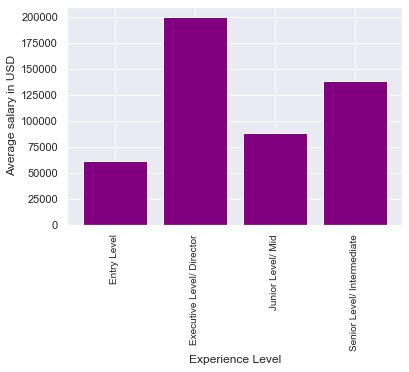

In [20]:
levels = [level for level, df in df1.groupby('Experience Level')]

plt.bar(levels, results['Salary in USD'], color = 'purple')
plt.xticks(levels, rotation = 'vertical', size = 10)
plt.ylabel('Average salary in USD')
plt.xlabel('Experience Level')
plt.show()

As expected Executive level employees earn most based on the average salary.

#### Question 2: What are the most sought after data science roles?

In [42]:
df1['Job Title'].value_counts()[:10]

Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: Job Title, dtype: int64

The top 5 most sought after data science roles are Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer and Research Scientist.

#### Question 3: What are the best paying data science roles?

In [22]:
results = df1.groupby('Job Title').mean()
results = results.nlargest(10,'Salary in USD')
results

,Work Year,Salary,Salary in USD
Job Title,,,
Data Analytics Lead,2022.000000,405000.000000,405000.000000
Principal Data Engineer,2021.000000,328333.333333,328333.333333
Financial Data Analyst,2021.500000,275000.000000,275000.000000
Principal Data Scientist,2021.000000,206714.285714,215242.428571
Director of Data Science,2021.000000,193285.714286,195074.000000
Data Architect,2021.727273,177873.909091,177873.909091
Applied Data Scientist,2021.600000,172400.000000,175655.000000
Analytics Engineer,2022.000000,175000.000000,175000.000000
Data Specialist,2021.000000,165000.000000,165000.000000


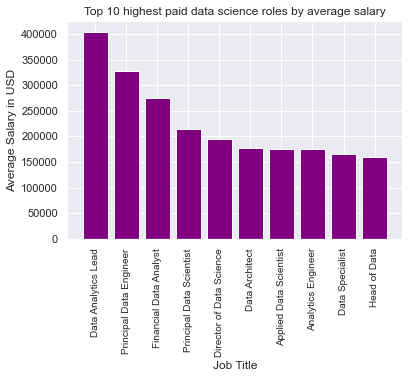

In [23]:
roles = ['Data Analytics Lead','Principal Data Engineer','Financial Data Analyst','Principal Data Scientist',
        'Director of Data Science','Data Architect','Applied Data Scientist','Analytics Engineer','Data Specialist',
        'Head of Data']
plt.bar(roles, results['Salary in USD'], color = 'purple')
plt.xticks(roles, rotation ='vertical', size = 10)
plt.title('Top 10 highest paid data science roles by average salary')
plt.ylabel('Average Salary in USD')
plt.xlabel('Job Title')
plt.show()

#### Question 4: Has pay generally improved over the years?

In [24]:
df1.groupby('Work Year')['Salary in USD'].mean()

Work Year
2020     95813.000000
2021     99853.792627
2022    124522.006289
Name: Salary in USD, dtype: float64

In [25]:
results = df1.groupby('Work Year').mean()
results

,Salary,Salary in USD
Work Year,,
2020,382386.236111,95813.000000
2021,546677.387097,99853.792627
2022,158827.786164,124522.006289


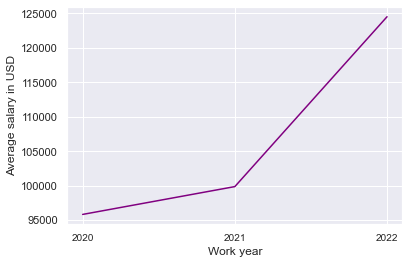

In [26]:
years = [year for year, df in df1.groupby('Work Year')]

plt.plot(years, results['Salary in USD'], color = 'purple')
plt.xticks(years, size = 10)
plt.ylabel('Average salary in USD')
plt.xlabel('Work year')
plt.show()

From the graph above, it can be seen that the average pay for data science roles has maintained an increase since 2020 through 2022.

#### Question 5: What is the best paying Employment type?

In [27]:
df1.groupby('Employment Type')['Salary in USD'].mean()

Employment Type
Contract     184575.000000
Full Time    113025.721284
Part Time     33070.500000
Name: Salary in USD, dtype: float64

In [28]:
results = df1.groupby('Employment Type').mean()
results

,Work Year,Salary,Salary in USD
Employment Type,,,
Contract,2021.000000,184000.000000,184575.000000
Full Time,2021.415541,329211.618243,113025.721284
Part Time,2021.000000,85476.000000,33070.500000


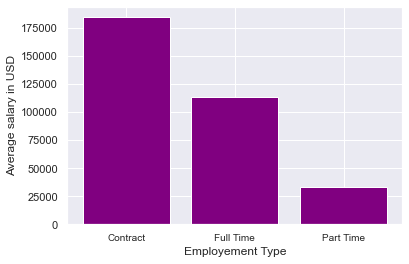

In [29]:
types = [Etype for Etype, df in df1.groupby('Employment Type')]

plt.bar(types, results['Salary in USD'], color = 'purple')
plt.xticks(types, size = 10)
plt.ylabel('Average salary in USD')
plt.xlabel('Employement Type')
plt.show()

Contract employees are paid the highest average salary (>180,000 USD)

In [30]:
JobCount = df1.groupby('Employment Type').count()['Job Title']
JobCount

Employment Type
Contract       5
Full Time    592
Part Time     10
Name: Job Title, dtype: int64

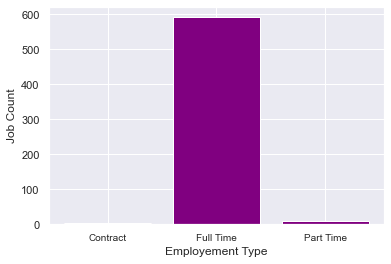

In [31]:
plt.bar(types, JobCount, color = 'purple')
plt.xticks(types, size = 10)
plt.ylabel('Job Count')
plt.xlabel('Employement Type')
plt.show()


From the above chart, we can deduce that most employees are working full time.

#### Question 6: What does the structure look like in terms of remote work?

In [32]:
results = df1.groupby('Remote Ratio').mean()
results

,Work Year,Salary,Salary in USD
Remote Ratio,,,
Hybrid,2020.909091,708018.171717,80823.030303
On site,2021.496063,218147.842520,106354.622047
Remote,2021.503937,259499.902887,122457.454068


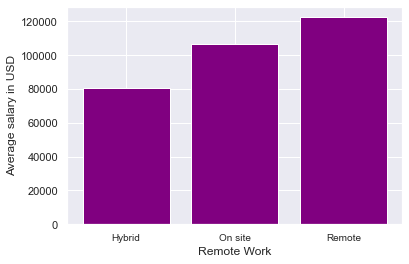

In [33]:
Ratio = [ratio for ratio, df in df1.groupby('Remote Ratio')]

plt.bar(Ratio, results['Salary in USD'], color = 'purple')
plt.xticks(Ratio, size = 10)
plt.ylabel('Average salary in USD')
plt.xlabel('Remote Work')
plt.show()

Remote workers are the highest paid in terms of  average salary.

In [34]:
results['Total Roles'] = 607
results

,Work Year,Salary,Salary in USD,Total Roles
Remote Ratio,,,,
Hybrid,2020.909091,708018.171717,80823.030303,607
On site,2021.496063,218147.842520,106354.622047,607
Remote,2021.503937,259499.902887,122457.454068,607


In [35]:
results['Count'] = df1['Remote Ratio'].value_counts()
results['% Count'] = ((results['Count'] / results['Total Roles']) * 100).round(0)
results

,Work Year,Salary,Salary in USD,Total Roles,Count,% Count
Remote Ratio,,,,,,
Hybrid,2020.909091,708018.171717,80823.030303,607,99,16.0
On site,2021.496063,218147.842520,106354.622047,607,127,21.0
Remote,2021.503937,259499.902887,122457.454068,607,381,63.0


From the table above, we can see that 63% of advertised roles are fully remote

In [36]:
df2 = df1[df1['Remote Ratio']=='Remote']
remotework = df2.groupby('Work Year').count()['Job Title']

In [37]:
AvgSalary = df2.groupby('Work Year').mean()["Salary in USD"]
AvgSalary

Work Year
2020    106693.611111
2021    114147.598291
2022    129210.750000
Name: Salary in USD, dtype: float64

In [38]:
results = df2.groupby('Work Year').mean()
results

,Salary,Salary in USD
Work Year,,
2020,239141.916667,106693.611111
2021,476121.102564,114147.598291
2022,151553.442982,129210.750000


In [39]:
df2.groupby('Work Year')['Work Year'].count()

Work Year
2020     36
2021    117
2022    228
Name: Work Year, dtype: int64

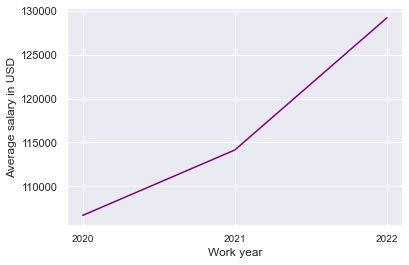

In [40]:
years = ['2020','2021', '2022']



plt.plot(years, results['Salary in USD'], color = 'purple')
plt.xticks(years, size = 10)
plt.ylabel('Average salary in USD')
plt.xlabel('Work year')
plt.show()

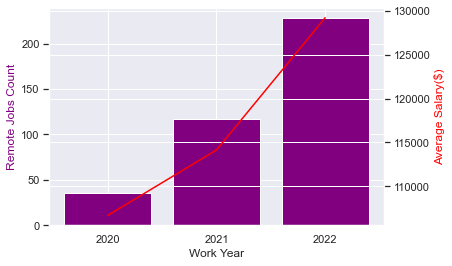

In [41]:
AvgSalary = df2.groupby('Work Year').mean()["Salary in USD"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(years, remotework, color='purple')
ax2.plot(years, AvgSalary, color='red')

ax1.set_xlabel('Work Year')
ax1.set_ylabel('Remote Jobs Count', color='purple')
ax2.set_ylabel('Average Salary($)', color='red')
ax1.set_xticklabels(years)

plt.show()

From the above chart, we can see that the number of remote jobs increased drastically from 2020 to 2022... this may be due to the covid-19 pandemic.Likewise the average salary of remote workers also maintained an increase through these years.